## *LEGACY* | MSTL Decomposition

## *LEGACY* | ARIMA models

In [ ]:
# Define the ARIMA input data
arima_input_df = stl_residual_wow

In [ ]:
predictions_ARIMA_log = pd.Series(0, index=sarimax_input_df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(sarimax_result.fittedvalues, fill_value=0)
predictions_ARIMA_log = predictions_ARIMA_log.add(stl_trend, fill_value=0)
predictions_ARIMA_log = predictions_ARIMA_log.add(stl_seasonal_w, fill_value=0)
predictions_ARIMA_log.head()

datetime
2018-09-06 00:00:00    1166.972508
2018-09-06 01:00:00     268.230905
2018-09-06 02:00:00    -104.038707
2018-09-06 03:00:00    -184.049051
2018-09-06 04:00:00    -195.511516
dtype: float64

In [ ]:
# Grid search for best ARIMA model
stepwise_model = auto_arima(arima_input_df,
                            start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            seasonal=True, trace=True,
                            error_action='ignore', suppress_warnings=True)

NameError: name 'arima_input_df' is not defined

In [ ]:
# Create ARIMA model
order = (3,0,5) #stepwise_model.order
arima_model = ARIMA(arima_input_df, order=order, freq='h')
arima_result = arima_model.fit()

c:\Users\Felix\AA_Project_New\AA2024\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS: 185147202.3832')

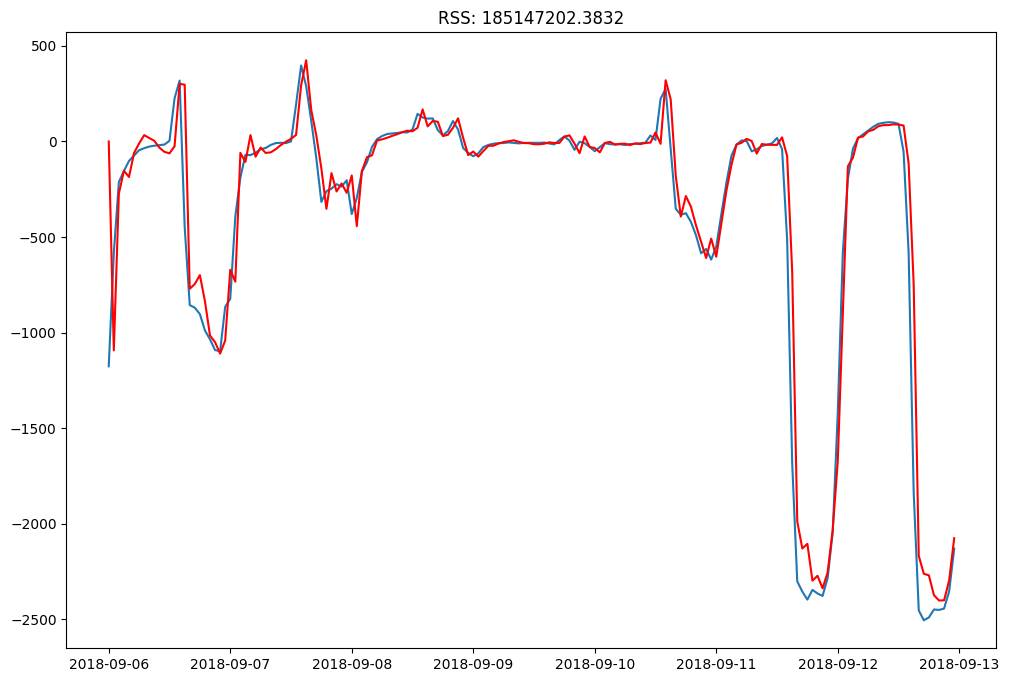

In [ ]:
plt.plot(arima_input_df[:24*7])
plt.plot(arima_result.fittedvalues[:24*7], color='red')
plt.title('RSS: %.4f'% sum((arima_result.fittedvalues-arima_input_df)**2))

In [ ]:
# Define input for MSTL decomposition
mstl_input_df = df1_train[['total minutes of parking']]

#Define STL parameters for MSTL decomposition
stl_kwargs = {"seasonal_deg": 0, 'trend_deg': 0, 'trend': 24*30+1}

# Run MSTL decomposition
mstl_model = MSTL(mstl_input_df, periods=(24, 24 * 7), windows=(25,169), stl_kwargs = stl_kwargs)
mstl_result = mstl_model.fit()
mstl_seasonal = mstl_result.seasonal
mstl_seasonal_d = mstl_result.seasonal['seasonal_24']
mstl_seasonal_w = mstl_result.seasonal['seasonal_168']
#mstl_seasonal_y = mstl_result.seasonal['seasonal_8760']
mstl_trend = mstl_result.trend
mstl_residual = mstl_result.resid

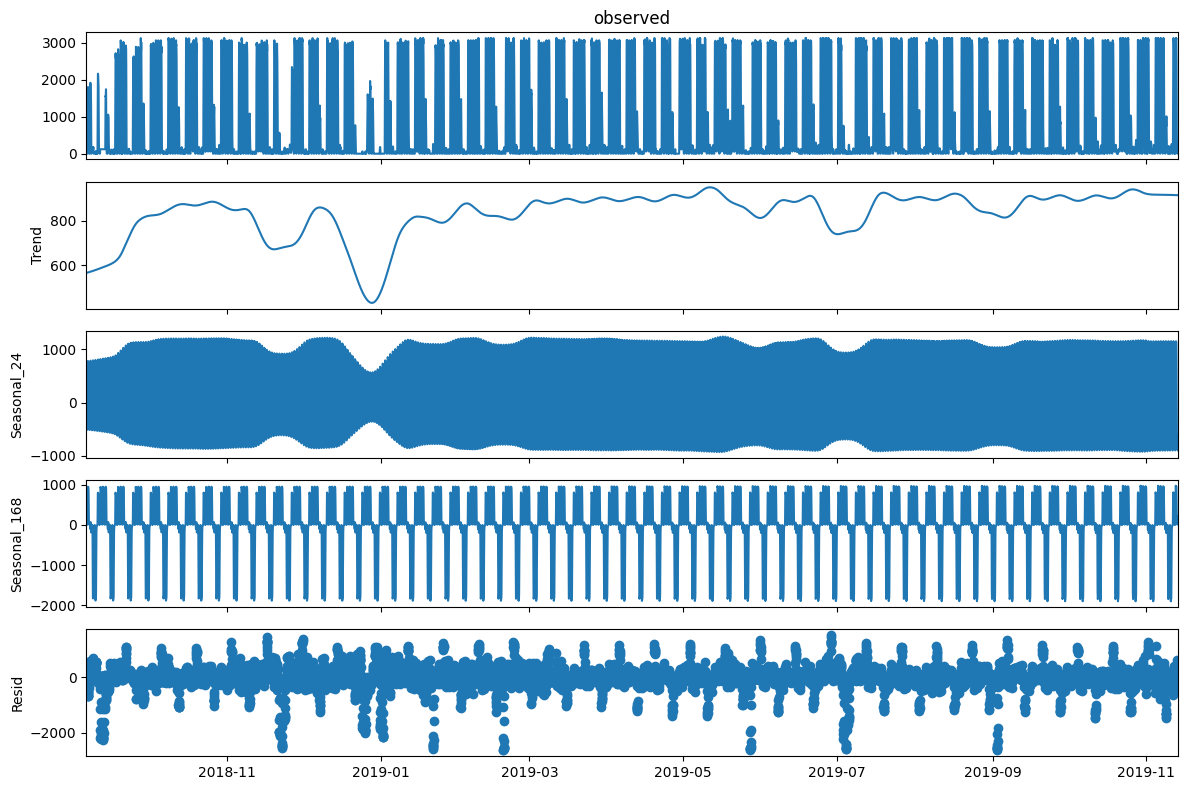

In [ ]:
# Plot the results of the MSTL decomposition
plt.rcParams["figure.figsize"] = (12,8)
mstl_result.plot();

In [ ]:
# # Detailed inspection of residuals
# plt.rcParams["figure.figsize"] = (12,8)
# mstl_residual[:24*30].plot();